n= 32 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 32 16 No (0.5000000 0.5000000)  
  2) Freq< 4.5 11  3 No (0.7272727 0.2727273) *
  3) Freq>=4.5 21  8 Yes (0.3809524 0.6190476)  
    6) Freq>=84.5 7  2 No (0.7142857 0.2857143) *
    7) Freq< 84.5 14  3 Yes (0.2142857 0.7857143) *


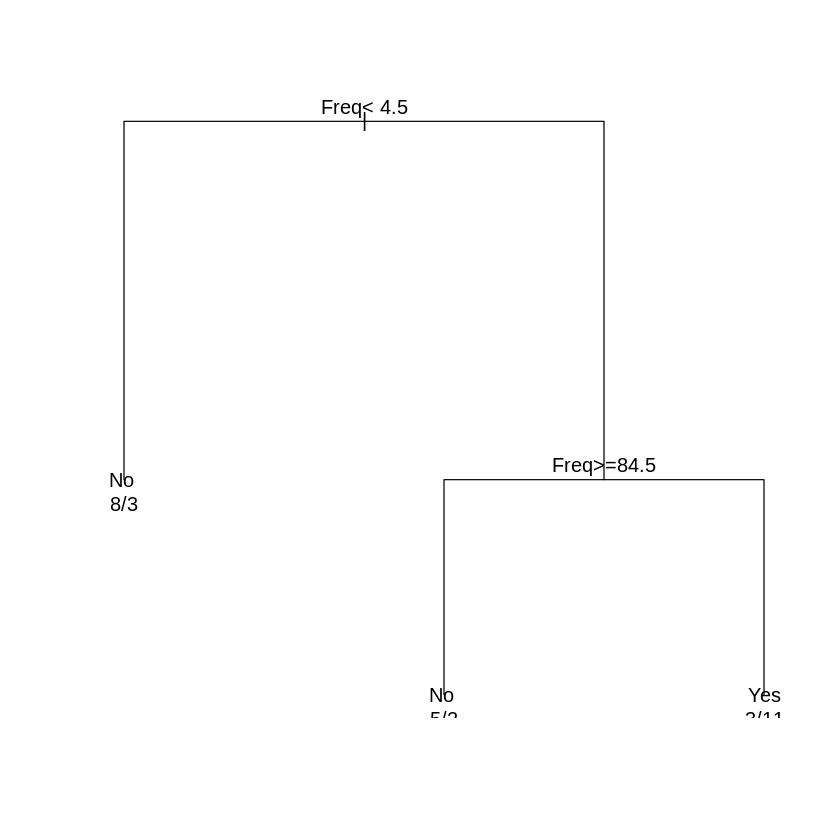

In [4]:
#RPART
library(rpart)
library(datasets)


data("Titanic")


titanic_df <- as.data.frame(Titanic)


fit_rpart <- rpart(Survived ~ .,
                   data = titanic_df, method = "class")

# Print or plot the tree
print(fit_rpart)
plot(fit_rpart)
text(fit_rpart, use.n=TRUE)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’


Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm




Model formula:
Survived ~ Class + Sex + Age + Freq

Fitted party:
[1] root: No (n = 32, err = 50.0%) 

Number of inner nodes:    0
Number of terminal nodes: 1


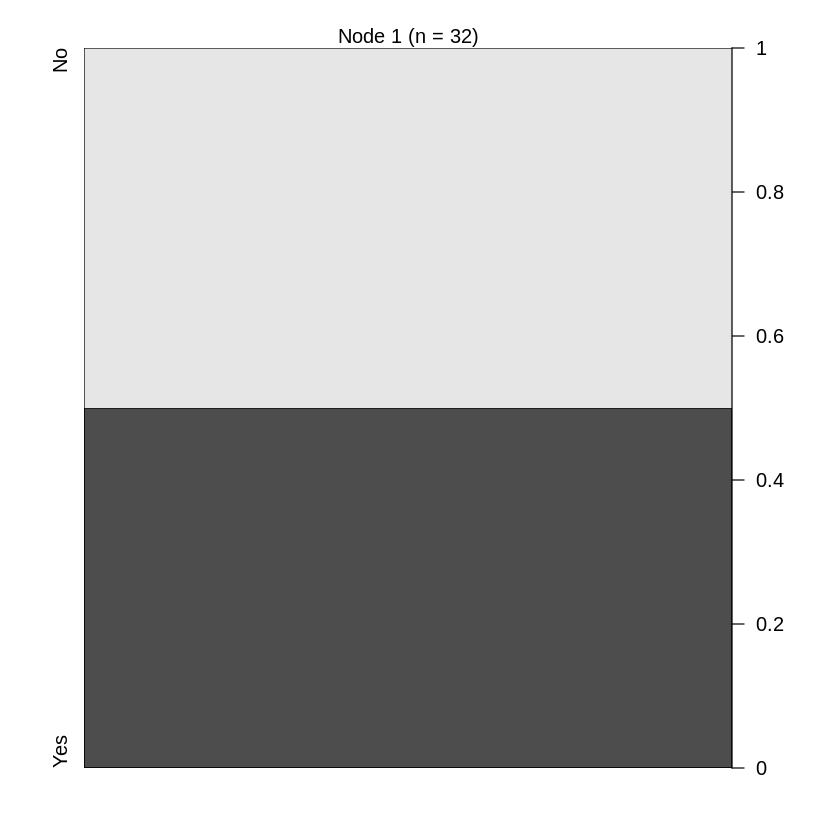

In [9]:
# CTREE
install.packages("partykit")
library(partykit)


fit_ctree <- ctree(Survived ~.,
                   data = titanic_df)

print(fit_ctree)
plot(fit_ctree)


Warning message in dist(titanic_df):
“NAs introduced by coercion”



Call:
hclust(d = dist_matrix)

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 32 



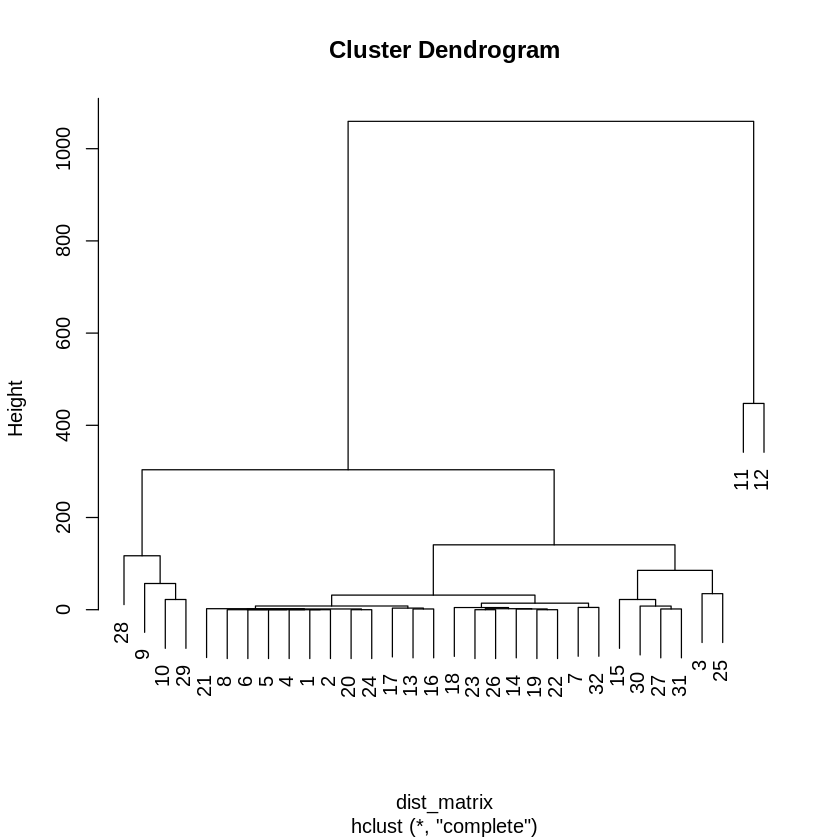

In [10]:

library(datasets)


data("Titanic")


titanic_df <- as.data.frame(Titanic)
titanic_df$Survived <- as.numeric(titanic_df$Survived) - 1


dist_matrix <- dist(titanic_df)
fit_hclust <- hclust(dist_matrix)


print(fit_hclust)
plot(fit_hclust)


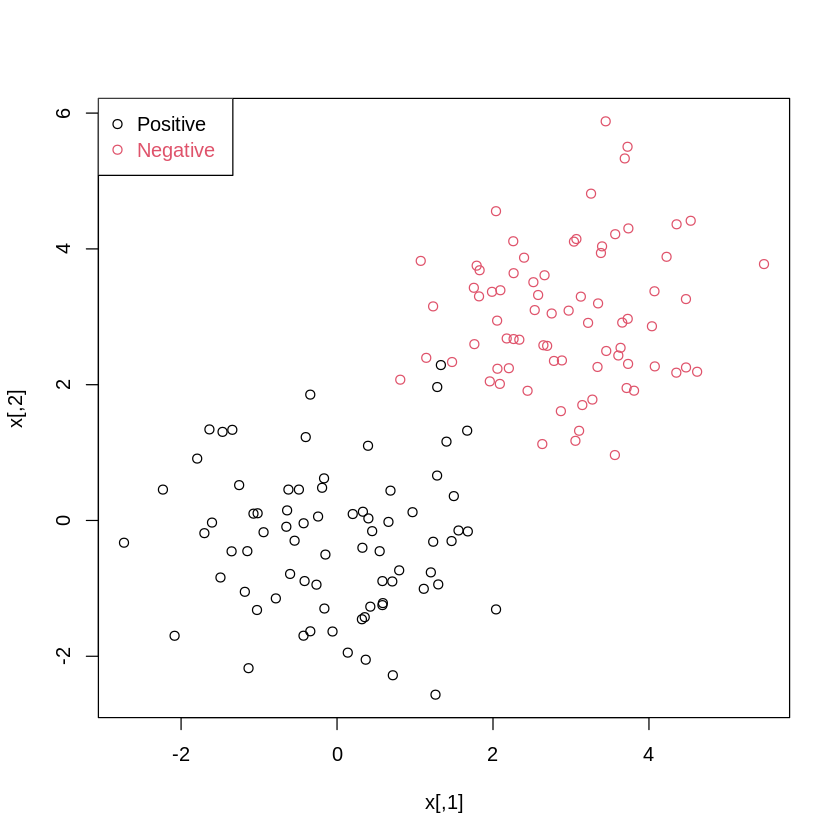

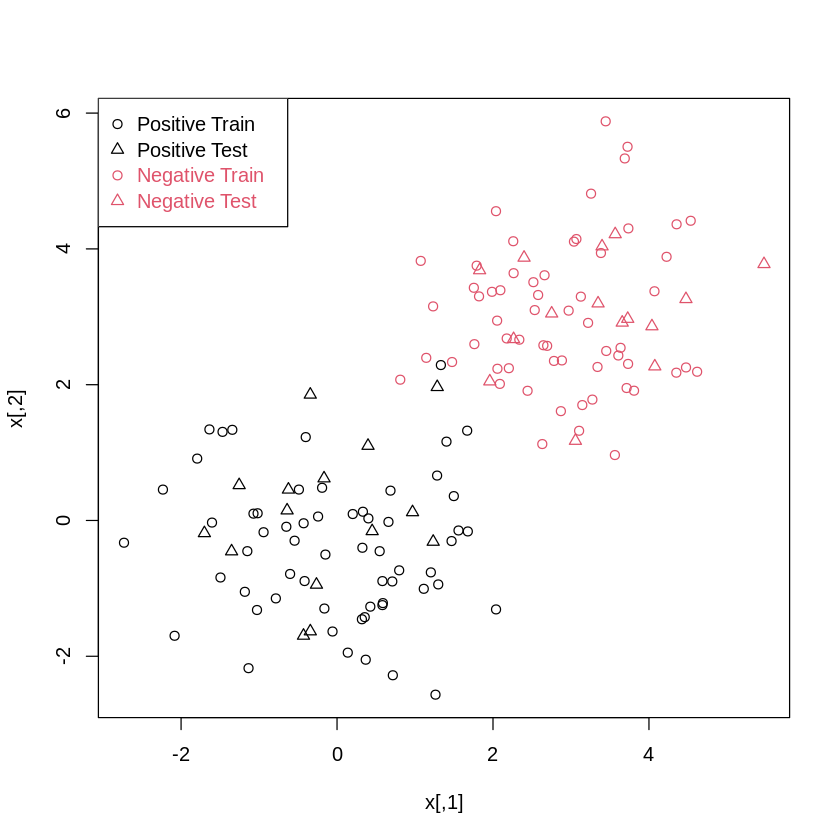

In [11]:
n <- 150 # number of data points
p <- 2 # dimension
sigma <- 1 # variance of the distribution
meanpos <- 0 # centre of the distribution of positive examples
meanneg <- 3 # centre of the distribution of negative examples
npos <- round(n/2) # number of positive examples
nneg <- n-npos # number of negative examples
# Generate the positive and negative examples
xpos <- matrix(rnorm(npos*p,mean=meanpos,sd=sigma),npos,p)
xneg <- matrix(rnorm(nneg*p,mean=meanneg,sd=sigma),npos,p)
x <- rbind(xpos,xneg)
# Generate the labels
y <- matrix(c(rep(1,npos),rep(-1,nneg)))
# Visualize the data
plot(x,col=ifelse(y>0,1,2))
legend("topleft",c('Positive','Negative'),col=seq(2),pch=1,text.col=seq(2))
#
ntrain <- round(n*0.8) # number of training examples
tindex <- sample(n,ntrain) # indices of training samples
xtrain <- x[tindex,]
xtest <- x[-tindex,]
ytrain <- y[tindex]
ytest <- y[-tindex]
istrain=rep(0,n)
istrain[tindex]=1
# Visualize
plot(x,col=ifelse(y>0,1,2),pch=ifelse(istrain==1,1,2))
legend("topleft",c('Positive Train','Positive Test','Negative Train','Negative Test'),col=c(1,1,2,2), pch=c(1,2,1,2), text.col=c(1,1,2,2))



In [14]:
install.packages ('e1071', dependencies = TRUE)
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘mlbench’, ‘randomForest’, ‘SparseM’, ‘xtable’, ‘slam’




The following objects are masked from iris (pos = 4):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species





Call:
svm.default(x = x, y = y)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  51




Call:
svm.default(x = x, y = y)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  51

 ( 8 22 21 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




            y
pred         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          2        48

,setosa/versicolor,setosa/virginica,versicolor/virginica
1,1.196152,1.091757,0.6708810
2,1.064621,1.056185,0.8483518
3,1.180842,1.074542,0.6439798
4,1.110699,1.053012,0.6782041


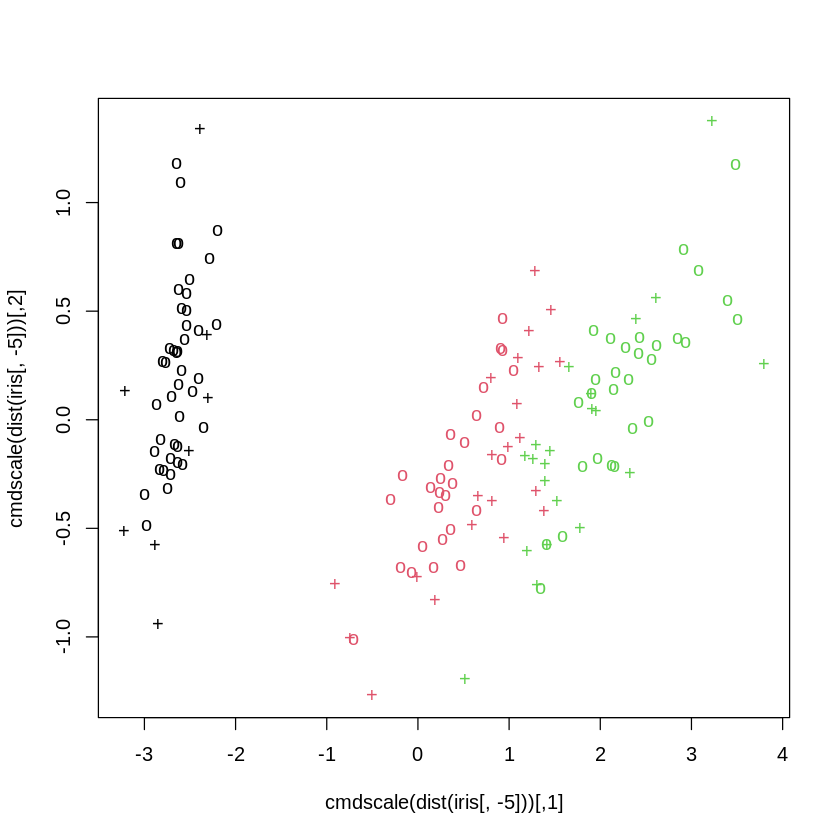

1     2 
 TRUE FALSE

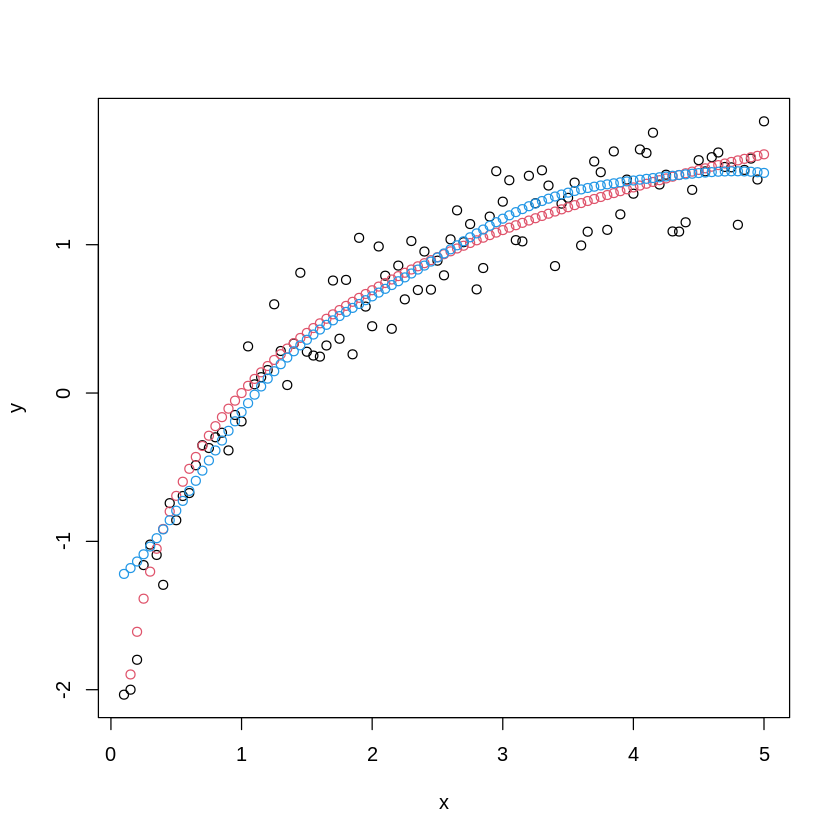

setosa versicolor 
        50        100


    setosa versicolor 
         2          1 

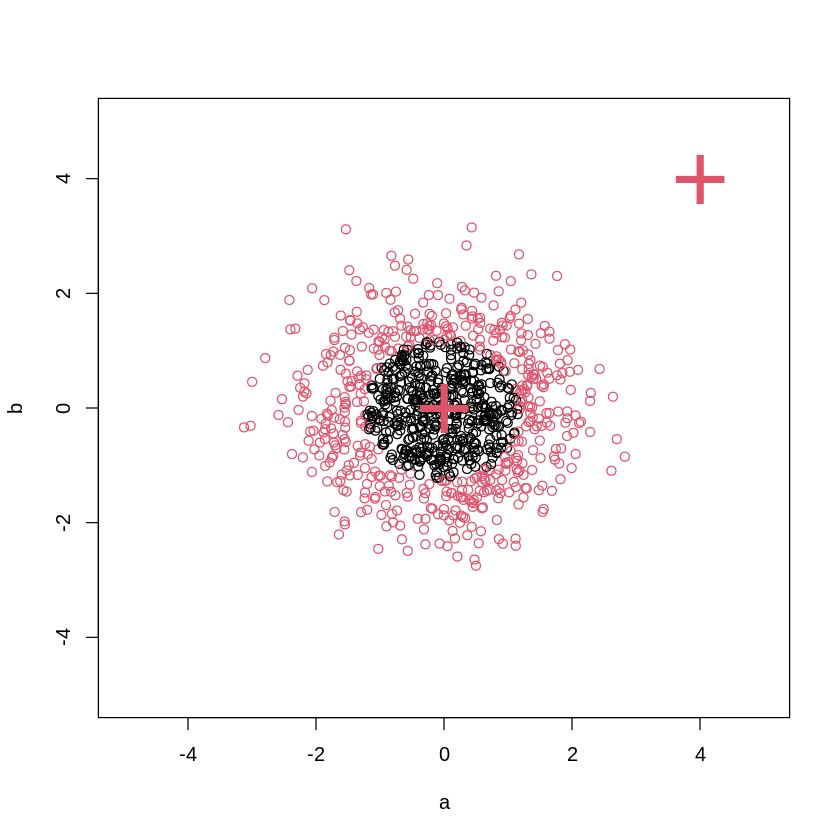

In [15]:
data(iris)
attach(iris)

## classification mode
# default with factor response:
model <- svm(Species ~ ., data = iris)

# alternatively the traditional interface:
x <- subset(iris, select = -Species)
y <- Species
model <- svm(x, y)

print(model)
summary(model)

# test with train data
pred <- predict(model, x)
# (same as:)
pred <- fitted(model)

# Check accuracy:
table(pred, y)

# compute decision values and probabilities:
pred <- predict(model, x, decision.values = TRUE)
attr(pred, "decision.values")[1:4,]

# visualize (classes by color, SV by crosses):
plot(cmdscale(dist(iris[,-5])),
     col = as.integer(iris[,5]),
     pch = c("o","+")[1:150 %in% model$index + 1])

## try regression mode on two dimensions

# create data
x <- seq(0.1, 5, by = 0.05)
y <- log(x) + rnorm(x, sd = 0.2)

# estimate model and predict input values
m   <- svm(x, y)
new <- predict(m, x)

# visualize
plot(x, y)
points(x, log(x), col = 2)
points(x, new, col = 4)

## density-estimation

# create 2-dim. normal with rho=0:
X <- data.frame(a = rnorm(1000), b = rnorm(1000))
attach(X)

# traditional way:
m <- svm(X, gamma = 0.1)

# formula interface:
m <- svm(~., data = X, gamma = 0.1)
# or:
m <- svm(~ a + b, gamma = 0.1)

# test:
newdata <- data.frame(a = c(0, 4), b = c(0, 4))
predict (m, newdata)

# visualize:
plot(X, col = 1:1000 %in% m$index + 1, xlim = c(-5,5), ylim=c(-5,5))
points(newdata, pch = "+", col = 2, cex = 5)

# weights: (example not particularly sensible)
i2 <- iris
levels(i2$Species)[3] <- "versicolor"
summary(i2$Species)
wts <- 100 / table(i2$Species)
wts
m <- svm(Species ~ ., data = i2, class.weights = wts)



In [19]:
install.packages("kernlab")
library(kernlab)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [23]:
 data(promotergene)

 ## create test and training set
 ind <- sample(1:dim(promotergene)[1],20)
 genetrain <- promotergene[-ind, ]
 genetest <- promotergene[ind, ]

 ## train a support vector machine
 gene <-  ksvm(Class~.,data=genetrain,kernel="rbfdot",kpar=list(sigma=0.015),C=70,cross=4,prob.model=TRUE)

 ## predict gene type probabilities on the test set
 genetype <- predict(gene,genetest,type="probabilities")
genetype

+,-
0.738766792,0.261233208
0.033653438,0.966346562
0.940482177,0.059517823
0.861042396,0.138957604
0.017334992,0.982665008
0.105763396,0.894236604
0.480705192,0.519294808
0.989299454,0.010700546
0.537340082,0.462659918
0.987165003,0.012834997


In [24]:
data(spam)

## create test and training set
index <- sample(1:dim(spam)[1])
spamtrain <- spam[index[1:floor(dim(spam)[1]/2)], ]
spamtest <- spam[index[((ceiling(dim(spam)[1]/2)) + 1):dim(spam)[1]], ]

## train a support vector machine
filter <- ksvm(type~.,data=spamtrain,kernel="rbfdot",
               kpar=list(sigma=0.05),C=5,cross=3)
filter

## predict mail type on the test set
mailtype <- predict(filter,spamtest[,-58])

## Check results
table(mailtype,spamtest[,58])




Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 5 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.05 

Number of Support Vectors : 940 

Objective Function Value : -1143.964 
Training error : 0.02087 
Cross validation error : 0.090435 

         
mailtype  nonspam spam
  nonspam    1342  112
  spam         54  792

In [25]:
data(iris)

## Create a kernel function using the build in rbfdot function
rbf <- rbfdot(sigma=0.1)
rbf

## train a bound constraint support vector machine
irismodel <- ksvm(Species~.,data=iris,type="C-bsvc",
                  kernel=rbf,C=10,prob.model=TRUE)

irismodel

## get fitted values
fitted(irismodel)

## Test on the training set with probabilities as output
predict(irismodel, iris[,-5], type="probabilities")




new("rbfkernel", .Data = function (x, y = NULL) 
{
    if (!is(x, "vector")) 
        stop("x must be a vector")
    if (!is(y, "vector") && !is.null(y)) 
        stop("y must a vector")
    if (is(x, "vector") && is.null(y)) {
        return(1)
    }
    if (is(x, "vector") && is(y, "vector")) {
        if (!length(x) == length(y)) 
            stop("number of dimension must be the same on both data points")
        return(exp(sigma * (2 * crossprod(x, y) - crossprod(x) - 
            crossprod(y))))
    }
}, kpar = list(sigma = 0.1))
<bytecode: 0x5804ec70a808>
<environment: 0x5804ec8c82e8>
attr(,"kpar")
attr(,"kpar")$sigma
[1] 0.1

attr(,"class")
[1] "rbfkernel"
attr(,"class")attr(,"package")
[1] "kernlab"

Support Vector Machine object of class "ksvm" 

SV type: C-bsvc  (classification) 
 parameter : cost C = 10 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.1 

Number of Support Vectors : 32 

Objective Function Value : -5.8442 -3.0652 -136.9786 
Training error : 0.02 
Probability model included. 

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] virginica  versicolor versicolor versicolor versicolor virginica 
 [79] versicolor versicolor versicolor versicolor versicolor virginica 
 [85] versicolor versicolor versicolor versicolor versicolor versicolor
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor virginica  virginica 
[103] virginica  virginica  virginica  virginica  virginica  virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica  virginica  virginica 
[121] virginica  virginica  virginica  virginica  virginica  virginica 
[127] virginica  virginica  virginica  virginica  virginica  virginica 
[133] virginica  virginica  virginica  virginica  virginica  virginica 
[139] virginica  virginica  virginica  virginica  virginica  virginica 
[145] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

setosa,versicolor,virginica
0.9814730,0.011273527,0.007253493
0.9751398,0.016648091,0.008212081
0.9836208,0.009261585,0.007117604
0.9794884,0.012276748,0.008234852
0.9827926,0.010096610,0.007110769
0.9668878,0.023104967,0.010007239
0.9814614,0.010252645,0.008285976
0.9801282,0.012233884,0.007637902
0.9793619,0.012146812,0.008491334
0.9796590,0.012833318,0.007507708


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

[1] " Kernel matrix used as input."

Number of Support Vectors : 10 

Objective Function Value : -6.5306 
Training error : 0.016667 

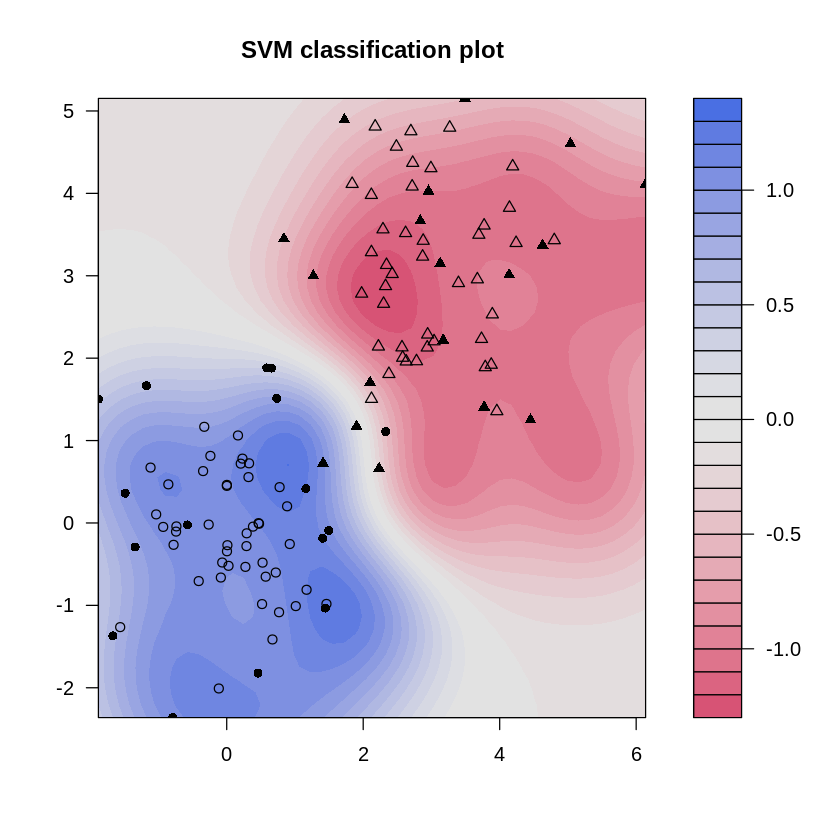

In [26]:
x <- rbind(matrix(rnorm(120),,2),matrix(rnorm(120,mean=3),,2))
y <- matrix(c(rep(1,60),rep(-1,60)))

svp <- ksvm(x,y,type="C-svc")
plot(svp,data=x)


### Use kernelMatrix
K <- as.kernelMatrix(crossprod(t(x)))

svp2 <- ksvm(K, y, type="C-svc")

svp2



[1]  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 5 


Number of Support Vectors : 41 

Objective Function Value : -0.5191 
Training error : 0 
Cross validation error : 0.122222 

[1] "list"       "vector"     "listOrNULL" "input"      "listI"     
[6] "lpinput"    "output"

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 10 

String kernel function.  Type =  spectrum 
 Hyperparameters : sub-sequence/string length =  5 
 Normalized 

Number of Support Vectors : 39 

Objective Function Value : -13.6834 
Training error : 0 
Cross validation error : 0.175824 

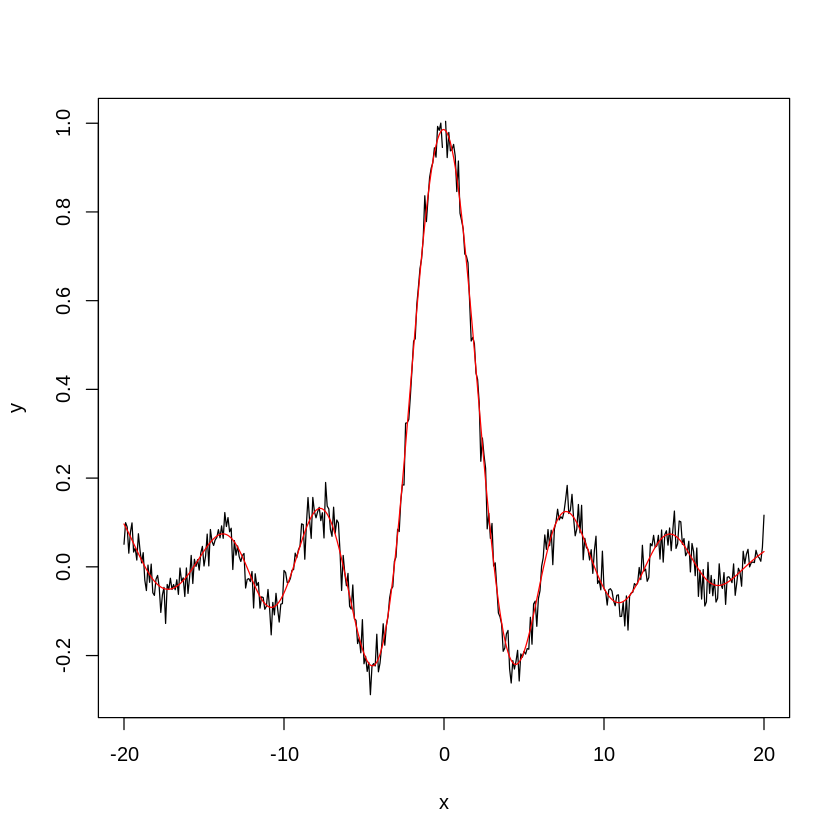

In [27]:
# test data
xtest <- rbind(matrix(rnorm(20),,2),matrix(rnorm(20,mean=3),,2))
# test kernel matrix i.e. inner/kernel product of test data with
# Support Vectors

Ktest <- as.kernelMatrix(crossprod(t(xtest),t(x[SVindex(svp2), ])))

predict(svp2, Ktest)


#### Use custom kernel

k <- function(x,y) {(sum(x*y) +1)*exp(-0.001*sum((x-y)^2))}
class(k) <- "kernel"

data(promotergene)

## train svm using custom kernel
gene <- ksvm(Class~.,data=promotergene[c(1:20, 80:100),],kernel=k,
             C=5,cross=5)

gene


#### Use text with string kernels
data(reuters)
is(reuters)
tsv <- ksvm(reuters,rlabels,kernel="stringdot",
            kpar=list(length=5),cross=3,C=10)
tsv


## regression
# create data
x <- seq(-20,20,0.1)
y <- sin(x)/x + rnorm(401,sd=0.03)

# train support vector machine
regm <- ksvm(x,y,epsilon=0.01,kpar=list(sigma=16),cross=3)
plot(x,y,type="l")
lines(x,predict(regm,x),col="red")


In [28]:

k <- function(x,y) {(sum(x*y) +1)*exp(-0.001*sum((x-y)^2))}
class(k) <- "kernel"

data(promotergene)

## train svm using custom kernel
gene <- ksvm(Class~.,data=promotergene[c(1:20, 80:100),],kernel=k,
             C=5,cross=5)

gene


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 5 


Number of Support Vectors : 41 

Objective Function Value : -0.5191 
Training error : 0 
Cross validation error : 0.072222 

In [29]:
data(reuters)
is(reuters)
tsv <- ksvm(reuters,rlabels,kernel="stringdot",
            kpar=list(length=5),cross=3,C=10)
tsv



[1] "list"       "vector"     "listOrNULL" "input"      "listI"     
[6] "lpinput"    "output"

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 10 

String kernel function.  Type =  spectrum 
 Hyperparameters : sub-sequence/string length =  5 
 Normalized 

Number of Support Vectors : 39 

Objective Function Value : -13.6834 
Training error : 0 
Cross validation error : 0.025641 

 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 100 

Linear (vanilla) kernel function. 

Number of Support Vectors : 6 

Objective Function Value : -410.2892 
Training error : 0.016667 

$param
$param$C
[1] 100


$scaling
`\001NULL\001`

$coef
$coef[[1]]
[1]  100.000000  -72.595062  -34.235095    6.830157 -100.000000  100.000000


$alphaindex
$alphaindex[[1]]
[1]  22  28  32  40  93 114


$b
[1] -5.656346

$obj
[1] -410.2892

$SVindex
[1]  22  28  32  40  93 114

$nSV
[1] 6

$prior
$prior[[1]]
$prior[[1]]$prior1
[1] 60

$prior[[1]]$prior0
[1] 60



$prob.model
$prob.model[[1]]
NULL


$alpha
$alpha[[1]]
[1] 100.000000  72.595062  34.235095   6.830157 100.000000 100.000000


$type
[1] "C-svc"

$kernelf
Linear (vanilla) kernel function. 

$kpar
list()

$xmatrix
$xmatrix[[1]]
           X1       X2
22  1.3316292 2.288876
28  2.6321215 1.125521
32  1.1439820 2.395245
40  1.4033603 1.161135
93  0.8107916 2.073498
114 1.6689004 1.322656


$ymatrix
  [1]  1  1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1 -1
 [26] -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1  1
 [51]  1 -1  1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1  1 -1 -1  1  1 -1  1 -

[[1]]
[1] 100.000000  72.595062  34.235095   6.830157 100.000000 100.000000

[[1]]
[1]  22  28  32  40  93 114

[1] -5.656346

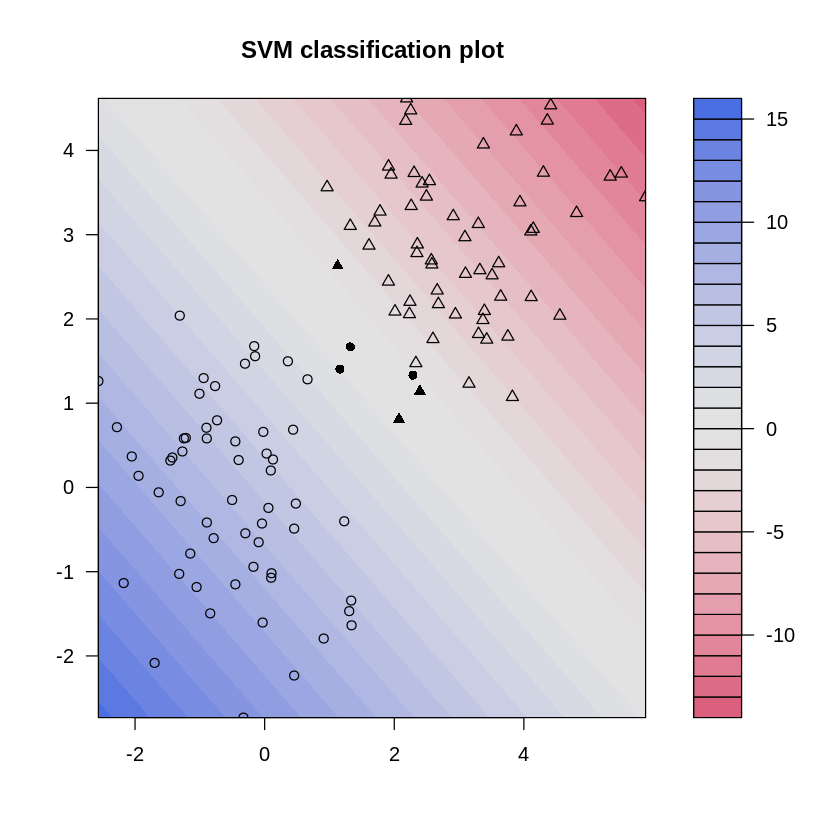

In [31]:
# load the kernlab package
library(kernlab)
# train the SVM
svp <- ksvm(xtrain,ytrain,type="C-svc",kernel='vanilladot',C=100,scaled=c())

# General summary
svp
# Attributes that you can access
attributes(svp)
# For example, the support vectors
alpha(svp)
alphaindex(svp)
b(svp)
# Use the built-in function to pretty-plot the classifier
plot(svp,data=xtrain)



In [32]:
v1 <- c(1,1,1,1,1,1,1,1,1,1,3,3,3,3,3,4,5,6)
v2 <- c(1,2,1,1,1,1,2,1,2,1,3,4,3,3,3,4,6,5)
v3 <- c(3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,5,4,6)
v4 <- c(3,3,4,3,3,1,1,2,1,1,1,1,2,1,1,5,6,4)
v5 <- c(1,1,1,1,1,3,3,3,3,3,1,1,1,1,1,6,4,5)
v6 <- c(1,1,1,2,1,3,3,3,4,3,1,1,1,2,1,6,5,4)
m1 <- cbind(v1,v2,v3,v4,v5,v6)
cor(m1)
factanal(m1, factors = 3) # varimax is the default
factanal(m1, factors = 3, rotation = "promax")
# The following shows the g factor as PC1
prcomp(m1) # signs may depend on platform

## formula interface
factanal(~v1+v2+v3+v4+v5+v6, factors = 3, scores = "Bartlett")$scores


,v1,v2,v3,v4,v5,v6
v1,1.0000000,0.9393083,0.5128866,0.4320310,0.4664948,0.4086076
v2,0.9393083,1.0000000,0.4124441,0.4084281,0.4363925,0.4326113
v3,0.5128866,0.4124441,1.0000000,0.8770750,0.5128866,0.4320310
v4,0.4320310,0.4084281,0.8770750,1.0000000,0.4320310,0.4323259
v5,0.4664948,0.4363925,0.5128866,0.4320310,1.0000000,0.9473451
v6,0.4086076,0.4326113,0.4320310,0.4323259,0.9473451,1.0000000



Call:
factanal(x = m1, factors = 3)

Uniquenesses:
   v1    v2    v3    v4    v5    v6 
0.005 0.101 0.005 0.224 0.084 0.005 

Loadings:
   Factor1 Factor2 Factor3
v1 0.944   0.182   0.267  
v2 0.905   0.235   0.159  
v3 0.236   0.210   0.946  
v4 0.180   0.242   0.828  
v5 0.242   0.881   0.286  
v6 0.193   0.959   0.196  

               Factor1 Factor2 Factor3
SS loadings      1.893   1.886   1.797
Proportion Var   0.316   0.314   0.300
Cumulative Var   0.316   0.630   0.929

The degrees of freedom for the model is 0 and the fit was 0.4755 


Call:
factanal(x = m1, factors = 3, rotation = "promax")

Uniquenesses:
   v1    v2    v3    v4    v5    v6 
0.005 0.101 0.005 0.224 0.084 0.005 

Loadings:
   Factor1 Factor2 Factor3
v1          0.985         
v2          0.951         
v3                  1.003 
v4                  0.867 
v5  0.910                 
v6  1.033                 

               Factor1 Factor2 Factor3
SS loadings      1.903   1.876   1.772
Proportion Var   0.317   0.313   0.295
Cumulative Var   0.317   0.630   0.925

Factor Correlations:
        Factor1 Factor2 Factor3
Factor1   1.000  -0.462   0.460
Factor2  -0.462   1.000  -0.501
Factor3   0.460  -0.501   1.000

The degrees of freedom for the model is 0 and the fit was 0.4755 

Standard deviations (1, .., p=6):
[1] 3.0368683 1.6313757 1.5818857 0.6344131 0.3190765 0.2649086

Rotation (n x k) = (6 x 6):
         PC1         PC2        PC3        PC4        PC5         PC6
v1 0.4168038 -0.52292304  0.2354298 -0.2686501 -0.5157193  0.39907358
v2 0.3885610 -0.50887673  0.2985906  0.3060519  0.5061522 -0.38865228
v3 0.4182779  0.01521834 -0.5555132 -0.5686880  0.4308467  0.08474731
v4 0.3943646  0.02184360 -0.5986150  0.5922259 -0.3558110 -0.09124977
v5 0.4254013  0.47017231  0.2923345 -0.2789775 -0.3060409 -0.58397162
v6 0.4047824  0.49580764  0.3209708  0.2866938  0.2682391  0.57719858

,Factor1,Factor2,Factor3
1,-0.9039949,-0.9308984,0.9475392
2,-0.8685952,-0.9328721,0.9352330
3,-0.9082818,-0.9320093,0.9616422
4,-1.0021975,-0.2529689,0.8178552
5,-0.9039949,-0.9308984,0.9475392
6,-0.7452711,0.7273960,-0.7884733
7,-0.7098714,0.7254223,-0.8007795
8,-0.7495580,0.7262851,-0.7743704
9,-0.8080740,1.4033517,-0.9304636
10,-0.7452711,0.7273960,-0.7884733
